In [317]:
# HW 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

white_wine = pd.read_csv("wine+quality/winequality-white.csv", delimiter=';')

red_wine = pd.read_csv("wine+quality/winequality-red.csv", delimiter=';')

In [318]:
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [319]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


12 features, all numerical, no Null values, types: float and int

In [320]:
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [321]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


12 features, all numerical, no Null values, types: float and int

The feature "Quality" will be our target.
Based on entries of datasets, lets work with white wine.

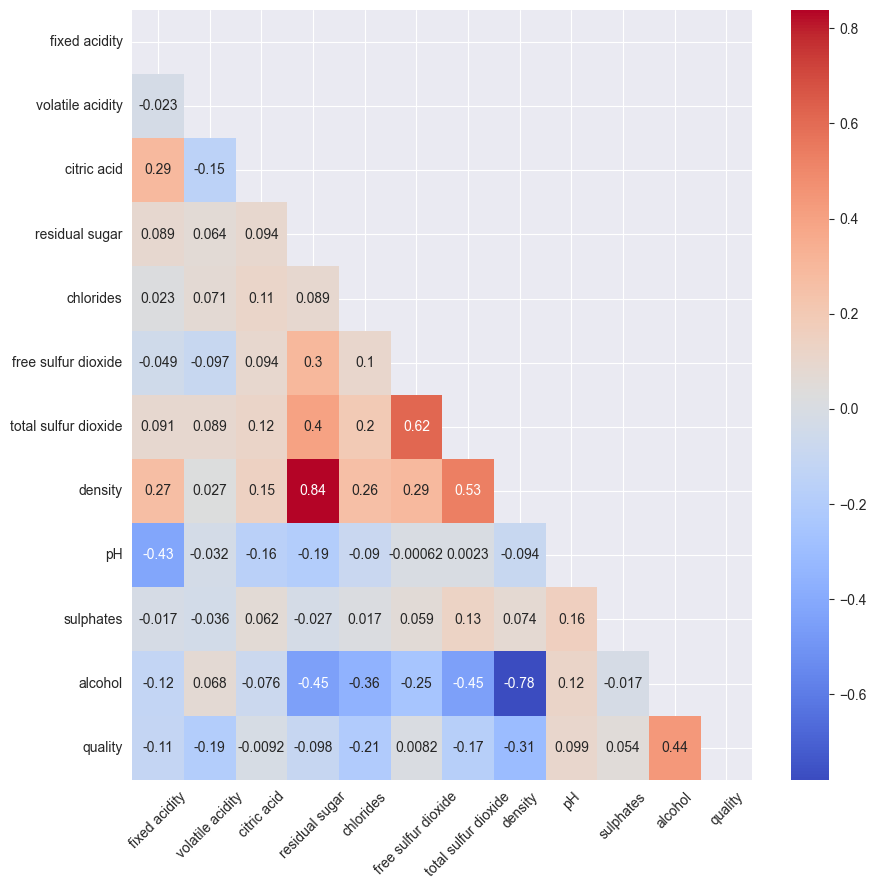

In [322]:
# For white wine
corr_white_matrix = white_wine.corr()

plt.figure(figsize=(10,10))
matrix_mask = np.triu(corr_white_matrix)
sns.heatmap(corr_white_matrix, mask=matrix_mask, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

Features positive correlation - density and residual sugar, total sulfur dioxide and free sulfur dioxide, density and total sulfur dioxide.
Features negative correlation - alcohol and density, alcohol and residual sugar, alcohol and total sulfur dioxide, pH and fixed acidity.
Target correlation:
 - positive corr quality and alcohol (0.44).
  - negative corr quality and density (-0.31

In [323]:
# Let`s count VIF. VIF identifies the correlation between independent variables and quantifies the strength of this correlation.
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_wo_target = white_wine.copy().drop(columns=['quality'])
vif = pd.DataFrame()
vif["features"] =df_wo_target.columns
vif["VIF Factor"] = [variance_inflation_factor(df_wo_target.values, i) for i in range(df_wo_target.shape[1])]
vif.sort_values(by="VIF Factor", ascending=False)

,features,VIF Factor
7,density,1056.497431
8,pH,609.861725
10,alcohol,118.707368
0,fixed acidity,92.861483
6,total sulfur dioxide,24.980802
9,sulphates,20.527123
2,citric acid,10.007114
1,volatile acidity,9.730569
5,free sulfur dioxide,9.261556
4,chlorides,6.497448


Multicolliniar features are:
- density
- pH
- alcohol
- fixed acidity
- total sulfur dioxide

For white wine:
We can see that total sulfur dioxide and free sulfur dioxide have a correlation and potentially could be multicolinear. total sulfur dioxide also shows high VIF.

In [324]:
# Let's combine total sulfur dioxide and free sulfur dioxide to one feature "Ratio of free to total sulfur dioxide":
white_wine['free_to_total_so2'] = white_wine['free sulfur dioxide'] / white_wine['total sulfur dioxide']
white_wine = white_wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1)

In [325]:
vif = pd.DataFrame()
df_wo_target = white_wine.copy().drop(columns=['quality'])
vif["features"] = df_wo_target.columns
vif["VIF Factor"] = [variance_inflation_factor(df_wo_target.values, i) for i in range(df_wo_target.shape[1])]
vif.sort_values(by="VIF Factor", ascending=False)

,features,VIF Factor
5,density,1072.172184
6,pH,601.054873
8,alcohol,108.452167
0,fixed acidity,92.538588
7,sulphates,20.139020
2,citric acid,9.929677
1,volatile acidity,9.593246
9,free_to_total_so2,9.131473
4,chlorides,6.478774
3,residual sugar,3.593974


In [326]:
vif = pd.DataFrame()
df_wo_target = df_wo_target.copy().drop(columns=['density'])
vif["features"] = df_wo_target.columns
vif["VIF Factor"] = [variance_inflation_factor(df_wo_target.values, i) for i in range(df_wo_target.shape[1])]
vif.sort_values(by="VIF Factor", ascending=False)

,features,VIF Factor
5,pH,145.932913
7,alcohol,95.691900
0,fixed acidity,56.728804
6,sulphates,20.135595
2,citric acid,9.923083
1,volatile acidity,9.508149
8,free_to_total_so2,8.917798
4,chlorides,6.075996
3,residual sugar,3.183392


In [327]:
vif = pd.DataFrame()
df_wo_target = df_wo_target.copy().drop(columns=['fixed acidity'])
vif["features"] = df_wo_target.columns
vif["VIF Factor"] = [variance_inflation_factor(df_wo_target.values, i) for i in range(df_wo_target.shape[1])]
vif.sort_values(by="VIF Factor", ascending=False)

,features,VIF Factor
4,pH,130.677822
6,alcohol,91.734367
5,sulphates,20.099297
0,volatile acidity,9.484326
7,free_to_total_so2,8.863144
1,citric acid,8.841768
3,chlorides,6.016966
2,residual sugar,3.067954


After deleting multicollinear features we can see that pH and alcohol also became lower, but those feature are correlated to target.

In [328]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,free_to_total_so2
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,0.994027,3.188267,0.489847,10.514267,5.877909,0.255577
std,0.843868,0.100795,0.121020,5.072058,0.021848,0.002991,0.151001,0.114126,1.230621,0.885639,0.094000
min,3.800000,0.080000,0.000000,0.600000,0.009000,0.987110,2.720000,0.220000,8.000000,3.000000,0.023622
25%,6.300000,0.210000,0.270000,1.700000,0.036000,0.991723,3.090000,0.410000,9.500000,5.000000,0.190935
50%,6.800000,0.260000,0.320000,5.200000,0.043000,0.993740,3.180000,0.470000,10.400000,6.000000,0.253677
75%,7.300000,0.320000,0.390000,9.900000,0.050000,0.996100,3.280000,0.550000,11.400000,6.000000,0.315789
max,14.200000,1.100000,1.660000,65.800000,0.346000,1.038980,3.820000,1.080000,14.200000,9.000000,0.710526


<Axes: xlabel='quality', ylabel='Density'>

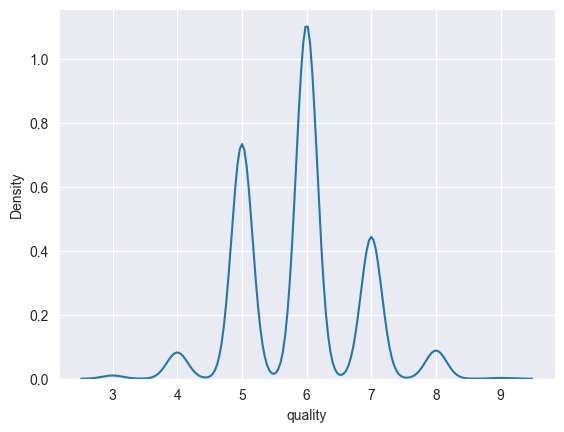

In [329]:
sns.kdeplot(data=white_wine, x='quality')

The distribution of wine quality ratings is noticeably imbalanced. Quality ratings of 6 are the most common, followed by 5 and 7. The quality ratings of 3, 4, 8, and 9 have significantly fewer instances.

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'free_to_total_so2']


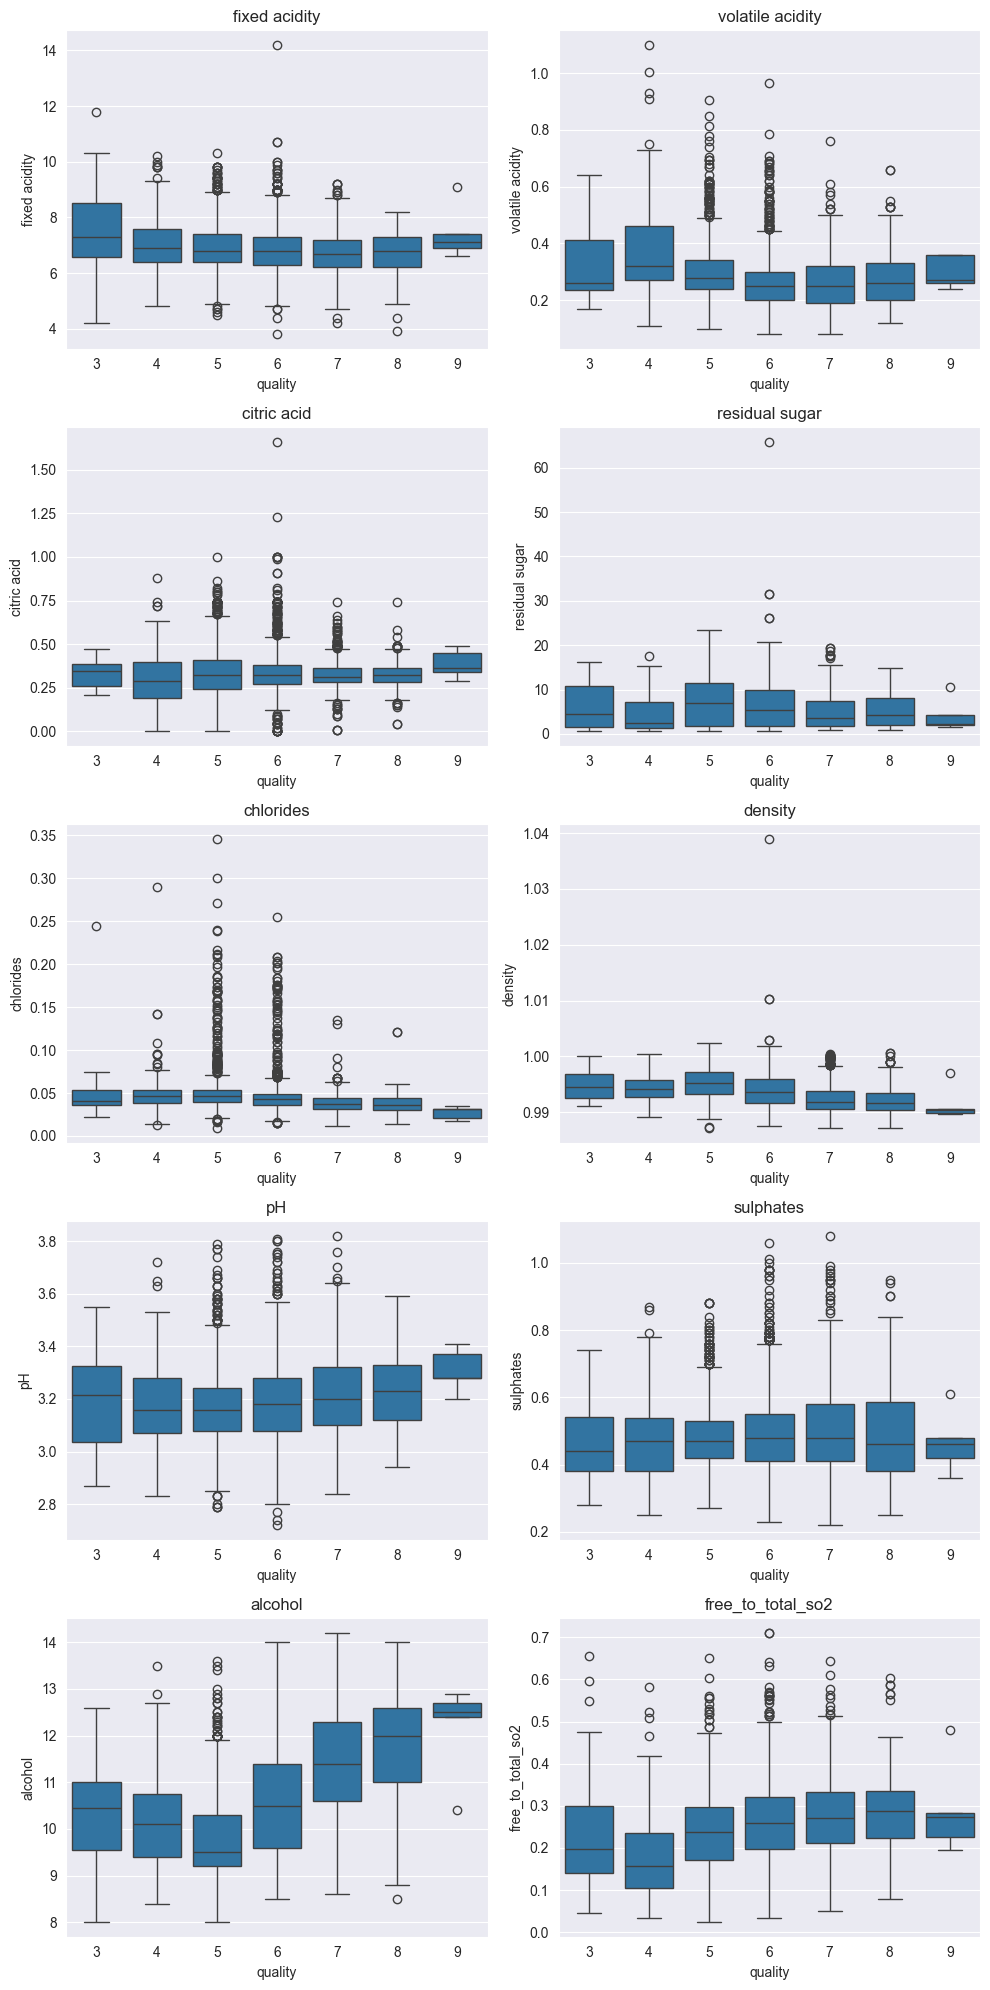

In [330]:
features = white_wine.columns.drop('quality').tolist()
print(features)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='quality', y=feature, data=white_wine, ax=axs[row][col])
    axs[row][col].set_title(feature)
plt.tight_layout()
plt.show()

- chlorides, volatile acidity have a lot of outliers
- pH, alcohol, sulphates and free_to_total_so2 have wider distribution then other

In [331]:
features = white_wine.columns.drop('quality').tolist()

X = white_wine[features]
y = white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.29666874 0.26679282 0.28590996 0.32226893 0.23613892]
Train Score: 0.2903456013339798
Test Score: 0.27465769827469544


All cross-validation scores are simular, so model is stable.
Train score and test score are also simular, it indicating that the model is neither overfitting nor underfitting significantly.

In [332]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
root_mse_train = root_mean_squared_error(y_train, y_train_pred)
    
mse_test = mean_squared_error(y_test, y_test_pred)
root_mse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error for Train: {mse_train}")
print(f"Root Mean Squared Error for Train: {root_mse_train}")
print(f"Mean Squared Error for Test: {mse_test}")
print(f"Root Mean Squared Error for Train: {root_mse_test}")

Mean Squared Error for Train: 0.5651958216010882
Root Mean Squared Error for Train: 0.751795066225556
Mean Squared Error for Test: 0.5476567666424265
Root Mean Squared Error for Train: 0.7400383548454947


Low Error Variation Between Train and Test: The MSE and RMSE for both training and test datasets are quite close to each other, which corroborates earlier interpretations of good model generalization without overfitting or underfitting significantly.